In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from statsmodels.stats.libqsturng import psturng

# Zadanie 
Pewna grupa poddała się trzem testom.
Na podstawie poniższych wyników chcielibyśmy zweryfikować hipotezę zerowa mówiącą, że środni wynik w tych trzech testach jest taki sam.

In [2]:
data = np.rec.array([
    (  1,   'mental',  2 ),
    (  2,   'mental',  2 ),
    (  3,   'mental',  3 ),
    (  4,   'mental',  4 ),
    (  5,   'mental',  4 ),
    (  6,   'mental',  5 ),
    (  7,   'mental',  3 ),
    (  8,   'mental',  4 ),
    (  9,   'mental',  4 ),
    ( 10,   'mental',  4 ),
    ( 11, 'physical',  4 ),
    ( 12, 'physical',  4 ),
    ( 13, 'physical',  3 ),
    ( 14, 'physical',  5 ),
    ( 15, 'physical',  4 ),
    ( 16, 'physical',  1 ),
    ( 17, 'physical',  1 ),
    ( 18, 'physical',  2 ),
    ( 19, 'physical',  3 ),
    ( 20, 'physical',  3 ),
    ( 21,  'medical',  1 ),
    ( 22,  'medical',  2 ),
    ( 23,  'medical',  2 ),
    ( 24,  'medical',  2 ),
    ( 25,  'medical',  3 ),
    ( 26,  'medical',  2 ),
    ( 27,  'medical',  3 ),
    ( 28,  'medical',  1 ),
    ( 29,  'medical',  3 ),
    ( 30,  'medical',  1 )], dtype=[('idx', '<i4'),
                                    ('Treatment', '|S8'),
                                    ('StressReduction', '<i4')])

In [21]:
df = pd.DataFrame(data)
d1=df["StressReduction"][df["Treatment"]==b'mental']
d2=df["StressReduction"][df["Treatment"]==b'physical']
d3=df["StressReduction"][df["Treatment"]==b'medical']

In [22]:
# First, check if the variances are equal, with the "Levene"-test
(W,p) = stats.levene(d1, d2, d3)
print(p)
if p<0.05:
    print(('Warning: the p-value of the Levene test is <0.05: p={0}'.format(p)))

0.456712056141


# Wykonujemy test ANOVA

In [3]:
df = pd.DataFrame(data)
model = ols('StressReduction ~ C(Treatment)',df).fit()
anovaResults =  anova_lm(model)
print(anovaResults)
if anovaResults['PR(>F)'][0] < 0.05:
    print('One of the groups is different.')

                df     sum_sq   mean_sq         F    PR(>F)
C(Treatment)   2.0  11.666667  5.833333  5.163934  0.012617
Residual      27.0  30.500000  1.129630       NaN       NaN
One of the groups is different.


D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## Wniosek
Ponieważ, odrzucamy hipotezę zerową o równości średnich zastanawiamy się czy któryś ze strzelców nie radzi sobie istotnie lepiej.

# Wykonujemy analizę post hoc

In [25]:
#Then, do the multiple testing
multiComp = MultiComparison(data['StressReduction'], data['Treatment'])

In [26]:
print((multiComp.tukeyhsd().summary()))

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1      group2   meandiff  lower  upper  reject
-----------------------------------------------------
b'medical'  b'mental'    1.5     0.3217 2.6783  True 
b'medical' b'physical'   1.0    -0.1783 2.1783 False 
b'mental'  b'physical'   -0.5   -1.6783 0.6783 False 
-----------------------------------------------------


In [27]:
# Calculate the p-values:
res2 = pairwise_tukeyhsd(data['StressReduction'], data['Treatment'])
#http://cleverowl.uk/2015/07/01/using-one-way-anova-and-tukeys-test-to-compare-data-sets/
#Należy również zauważyć, że funkcja tukeyhsd() ma parametr alfa, 
#którego nie określamy wyraźnie, 
#ponieważ jesteśmy zadowoleni ze swojej wartości domyślnej (α = 0.05α = 0.05).
df = pd.DataFrame(data)
numData = len(df)
numTreatments = len(df.Treatment.unique())
dof = numData - numTreatments
# Show the group names
print((multiComp.groupsunique))
# Generate a print -------------------
    


[b'medical' b'mental' b'physical']


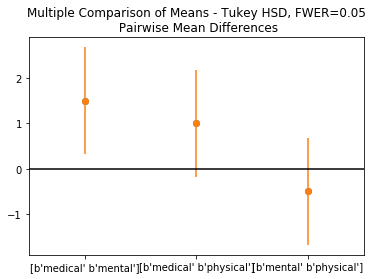

In [15]:
# Get the data
xvals = np.arange(3)
res2 = pairwise_tukeyhsd(data['StressReduction'], data['Treatment'])
errors = np.ravel(np.diff(res2.confint)/2)

# Plot them
plt.plot(xvals, res2.meandiffs, 'o')
plt.errorbar(xvals, res2.meandiffs, yerr=errors, fmt='o')

# Put on labels
pair_labels = multiComp.groupsunique[np.column_stack(res2._multicomp.pairindices)]
plt.xticks(xvals, pair_labels)

# Format the plot
xlim = -0.5, 2.5
plt.hlines(0, *xlim)
plt.xlim(*xlim)
plt.title('Multiple Comparison of Means - Tukey HSD, FWER=0.05' + '\n Pairwise Mean Differences')          
plt.show()